<center>
</center>


#  Аварии на шахтах

In [13]:
import numpy as np

from IPython.display import HTML
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
from math import factorial,exp

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline
COLLAB = False

На угольных шахтах ежегодно происходят аварии. Англия довольно давно собирает информацию о числе крупных аварий. Именно её нам предстоит проанализировать:

* хочется понять как часто в среднем происходят аварии 
* насколько большой у среднего числа аварий доверительный интервал

In [3]:
if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df = pd.read_csv("/content/gdrive/MyDrive/DA/3/1/coals.csv", index_col=0)
else:
    df = pd.read_csv("coals.csv", index_col=0)
df.head()

Mounted at /content/gdrive


,year,count
1,1851,4
2,1852,5
3,1853,4
4,1854,1
5,1855,0


В колонке `year` находится год наблюдений. В колонке `count` число аварий за этот год на шахтах в Англии. Посмотрим на распределение числа аварий. 

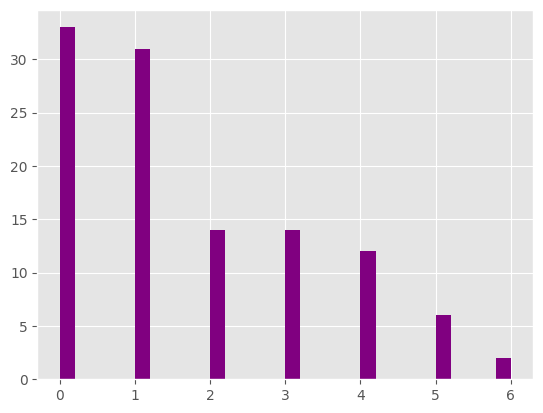

In [4]:
df['count'].hist(bins=30, color="purple");

Судя по гистограмме уместно предположить, что число аварий имеет распределение Пуассона, $Poiss(\lambda)$.  То есть, если мы хотим что-то понять про среднее число аварий, нам надо оценить параметр $\lambda$. 

__а) Метод моментов__

Найдите оценку параметра $\lambda$ с помощью метода моментов. Запишите получившийся результат в переменную `lambda_hat`.

In [5]:
n_hat = df.shape[0]   # число наблюдений 
lam_hat = np.mean(df['count'])  

print("lam_hat =",lam_hat )

lam_hat = 1.7053571428571428


In [6]:
assert n_hat == 112 

__б) Стандартное отклонение__ 

Среднее, оценённое методом моментов будет иметь асимптотически нормальное распределение. Оцените стандартное отклонение этого распределения по выборке и запишите ответ в переменную `lam_se`. 

> __Примечание:__ мы предполагаем, что выборка пришла из распределения Пуассона. Для него $Var(X) = \lambda$. Для оценки стандартного отклонения используйте этот факт. Конечно же вы можете оценить его через функцию `std`, в плане асимптотики результат получится одинаковый. Оба способа корректны. Но с точки зрения грейдера, у вас будет ошибка. 

In [7]:
lam_se = np.sqrt(lam_hat/n_hat)        # ваша оценка
print("lam_se =", lam_se)

lam_se = 0.1233953121525469


In [8]:
# проверка, что оценка была найдена корректно 
assert lam_se < 1.6474

__в) Доверительный интервал__ 

Постройте для неизвестного математического ожидания $\lambda$ доверительный интервал. Возьмите уровень значимости равный $10\%$. В переменные `left` и `right` запишите соотвествующие границы интервала. В переменную `delta` запишите его ширину.

In [9]:
alpha = 0.1
norm_rv = sts.norm(loc=0, scale=1)
z_alpha=norm_rv.ppf(1 - alpha / 2)

left = lam_hat - z_alpha * lam_se
right = lam_hat + z_alpha * lam_se
delta = right - left

print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [1.5, 1.91] ширины 0.406


In [10]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 1.502389916114217) < 1e-5

__г) Число катастроф__  

Многие говорят, что в $20$ веке катастроф стало на порядок меньше. Давайте проверим это. Постройте оценку для $\lambda_1$ по данным до $1900$ года включительно. Постройте оценку для $\lambda_2$ по данным после $1900$ года. Для разности $\lambda_1 - \lambda_2$ постройте $95\%$ доверительный интервал. 

In [11]:
x = df[df.year <= 1900]['count']
y = df[df.year > 1900]['count']

alpha = 0.05
norm_rv = sts.norm(loc=0, scale=1)
z_alpha = norm_rv.ppf(1 - alpha/2)

lam_hat_x = x.mean()
lam_hat_y = y.mean()
lam_se = np.sqrt(lam_hat_x / x.shape[0]+ lam_hat_y / y.shape[0])

left=lam_hat_x - lam_hat_y - z_alpha*lam_se
right = lam_hat_x - lam_hat_y + z_alpha*lam_se
delta = right - left

print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [1.28, 2.31] ширины 1.03


In [12]:
# проверка, что границы доверительного интервала найдены верно
assert x.size == 50
assert np.abs(left - 1.2835473859716393) < 1e-5

Ноль не вошёл в этот доверительный интервал. Это означает, что на уровне значимости $5\%$ мы можем сказать, что число аварий правда снизилось. 

__д) Вероятность для распределения Пуассона__ 

Вспомните формулу, по которой считается вероятность того, что Пуассоновская случайная величина примет какое-то значение. Найдите точечную оценку вероятности того, что произойдёт только одна авария. В качестве $\lambda$ используйте оценку метода моментов, полученную в первом задании. 

In [15]:
def poiss_prob(k):
    return (lam_hat**k * np.exp(-lam_hat))/factorial(k)


In [16]:
# проверка,функции
assert np.abs(poiss_prob(1) - 0.3098761) < 1e-5


__е) Дельта-метод__ 

Та вероятность, которую мы нашли в предыдущем пункте - это лишь точечная оценка. Она является функцией от среднего. С помощью дельта-метода постройте для этой вероятности $95\%$ довертельный интервал.

In [18]:
alpha = 0.05
norm_rv = sts.norm(loc=0, scale=1)
n = df.shape[0]
g_m = lam_hat * np.exp(-lam_hat)
g_se = np.sqrt(lam_hat / n  * np.exp(-2 * lam_hat)*(1 - 2 * lam_hat + lam_hat**2))

z_alpha=norm_rv.ppf(1 - alpha / 2)
left = g_m - z_alpha * g_se
right = g_m + z_alpha * g_se
delta = right - left

print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [0.279, 0.341] ширины 0.062


In [19]:
# проверка, что интервал построен корректно
assert np.abs(left - 0.279) < 1e-3

По аналогии можно построить доверительные интервалы для вероятности того, что случайная величина примет значения от нуля до девяти. Проделайте это в качестве необязательного упражнения и оформите процедуру расчёта в виде функции.

In [30]:
def prob_ci(k, alpha = 0.01, lam_hat=lam_hat):
    norm_rv = sts.norm(loc=0, scale=1)
    z_alpha = norm_rv.ppf(1 - alpha / 2)
    g_m=(lam_hat**k * np.exp(-lam_hat))/factorial(k)
    if k!=0:
        g_se = np.sqrt(lam_hat/df.shape[0]*np.exp(-2*lam_hat)*(lam_hat**(k-1)/factorial(k-1)-lam_hat**k/factorial(k))**2)
    else:
        g_se = np.sqrt(lam_hat/df.shape[0]* np.exp(-2*lam_hat))

    left = g_m - z_alpha * g_se
    right = g_m + z_alpha * g_se
    return (left, right)

In [31]:
left, right = prob_ci(1)
delta = right - left

assert np.abs(delta - 0.08147) < 1e-5

left, right = prob_ci(0)
delta = right - left

assert np.abs(delta - 0.11551) < 1e-5

Сделали функцию? Запускайте код для не очень информативной картинки!

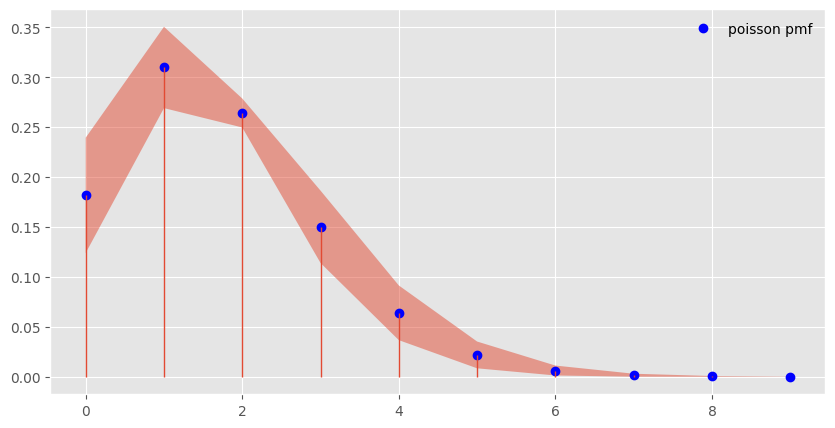

In [37]:
poiss_rv = sts.poisson(lam_hat)
leftarr = []
rightarr = []
x = np.arange(10)
p = poiss_rv.pmf(x)
for i in x:
    left, right = prob_ci(i)
    leftarr.append(left)
    rightarr.append(right)

left = leftarr
right = rightarr
plt.figure(figsize=(10,5))
plt.plot(x, p, 'bo', ms=6, label='poisson pmf')
plt.fill_between(x, left, right, alpha=0.5)
plt.vlines(x, 0, p, lw=1)
plt.legend(loc='best', frameon=False)
plt.show()

In [38]:
for k,(i,j) in enumerate(zip(left, right)):
    print(f"Вероятность P(X={k}) лежит между  {i:.5} и {j:.5}")

Вероятность P(X=0) лежит между  0.12395 и 0.23946
Вероятность P(X=1) лежит между  0.26914 и 0.35061
Вероятность P(X=2) лежит между  0.24971 и 0.27873
Вероятность P(X=3) лежит между  0.11396 и 0.18644
Вероятность P(X=4) лежит между  0.036649 и 0.091422
Вероятность P(X=5) лежит между  0.0084293 и 0.035252
Вероятность P(X=6) лежит между  0.0012388 и 0.011177
Вероятность P(X=7) лежит между  1.9936e-05 и 0.0030047
Вероятность P(X=8) лежит между  -5.5837e-05 и 0.00070061
Вероятность P(X=9) лежит между  -2.1966e-05 и 0.00014414


Интервалы получился довольно короткими. Попробуйте поиграться с уровнем значимости и посмотреть как они меняются в зависимости от него. 

В этой терадке нам осталось обсудить последний нюанс. Мы из теории вероятностей знаем, что для случайной величины $X$, имеющей распределение Пуассона $\mathbb{E}(X) = Var(X) = \lambda$. Для текущей выборки мы видим, что между дисперсией и средним есть небольшое отличие. 

In [ ]:
df['count'].mean()

In [ ]:
df['count'].var()

Не факт, что мы имеем право предполагать, что наша выборка пришла к нам из распределения Пуассона. Все предпосылки о распределениях выборки нужно тестировать. Позже мы научимся это делать.